<h1><center>Arunaggiri Pandian Karunanidhi</center></h1>

### I. EXTRA CREDIT (5 points): Use PyTorch (by switching to a different kernel) to build a simple fully-connected artificial neural network for the beans classification based on the chosen features provided in the data. Generate a confusion matrix for the test data set to demonstrate the accuracy of the model. Based on your model, classify the beans provided in the unlabeled beans-unknown.csv data set. Indicate which classification has been assigned to each of the unlabeled beans. How do the results with the artificial neural network compare to the support vector machine model?

In [1]:
import pandas as pd
from sklearn import preprocessing
import torch
import torch.nn as nn
import seaborn as sns

In [2]:
df = pd.read_csv('beans.csv')
df.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER


<AxesSubplot:xlabel='Class', ylabel='count'>

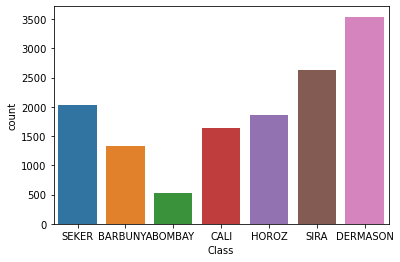

In [3]:
# Visualizing the distribution of the target class

sns.countplot(x = 'Class', data=df)

In [4]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [5]:
le = preprocessing.LabelEncoder()
le.fit(df['Class'])

LabelEncoder()

In [6]:
df['Class'] = le.transform(df['Class'])

In [7]:
df['Class'].unique()

array([5, 0, 1, 2, 4, 6, 3])

In [8]:
df.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5


In [9]:
print(df.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       1
ShapeFactor4       0
Class              0
dtype: int64


<AxesSubplot:xlabel='Class', ylabel='count'>

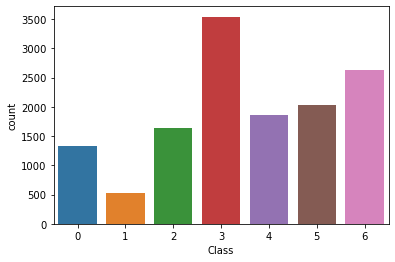

In [10]:
sns.countplot(x = 'Class', data=df)

In [11]:
# replacing null value with median value

# mode value is
print(df['ShapeFactor3'].median())

# add .mode()[0] as mode returns a series
df['ShapeFactor3'] = df["ShapeFactor3"].fillna(df['ShapeFactor3'].median())

print(len(df[df['ShapeFactor3'].isna()]['ShapeFactor3']))

0.6424101875
0


In [12]:
# scaling features

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer


columns_need_to_be_scaled = df.drop(columns=['Class']).columns

SS = StandardScaler().fit(df[columns_need_to_be_scaled])

df[columns_need_to_be_scaled] = pd.DataFrame(SS.transform(df[columns_need_to_be_scaled]), 
                                                   columns=columns_need_to_be_scaled)

df.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.838853,-1.139688,-1.301921,-0.632217,-1.564982,-2.182023,-0.839544,-1.060495,0.288035,0.366749,1.420254,1.838075,0.681965,2.397588,1.924193,0.838758,5
1,-0.827322,-1.010590,-1.391089,-0.435922,-1.971943,-3.684171,-0.824236,-1.041419,0.697652,-0.465418,0.225234,2.496844,0.369690,3.096544,2.690565,0.771240,5
2,-0.805349,-1.075346,-1.247768,-0.586894,-1.513942,-2.041468,-0.806883,-1.005376,0.578012,0.517851,1.248936,1.763526,0.604443,2.230451,1.839561,0.917476,5


In [13]:
X = df.iloc[:, 0:-1]

In [14]:
y = df.iloc[:, -1]

In [15]:
X = X.to_numpy()

In [16]:
X

array([[-0.8388525 , -1.13968829, -1.30192147, ...,  2.39758822,
         1.92419328,  0.83875835],
       [-0.82732195, -1.01058983, -1.39108908, ...,  3.09654363,
         2.69056462,  0.77123968],
       [-0.80534927, -1.07534626, -1.24776821, ...,  2.23045069,
         1.83956129,  0.91747579],
       ...,
       [-0.37137187, -0.44579629, -0.44719479, ...,  0.28391186,
         0.32981927,  0.38873236],
       [-0.37109977, -0.4250396 , -0.42572569, ...,  0.22306101,
         0.24219074,  0.03341647],
       [-0.37069161, -0.38565868, -0.2887106 , ..., -0.1332084 ,
        -0.28491007,  0.71357655]])

In [17]:
y = y.to_numpy()

In [18]:
y

array([5, 5, 5, ..., 3, 3, 3])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
# input layer nodes = 16 --> number of features
# hidden layer nodes = 3 
# outplut layer nodes = 3 --> number of categories
iln = 16
hln = 3
oln = 7
eta = 0.01
num_epoch = 10000

In [21]:
# fc = fully connected
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(iln, hln)
        self.out = nn.Linear(hln, oln)
    def forward(self, x):
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.out(x)
        out = nn.functional.softmax(x, dim = 1)
        return out

In [22]:
model = Net()

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = eta)

In [24]:
X = torch.Tensor(X_train).float()
y = torch.Tensor(y_train).long()

In [25]:
for epoch in range(num_epoch): 
    optimizer.zero_grad()
    out = model(X)
    loss = criterion(out, y)
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0: 
        print('epoch:', epoch, 'loss:', loss.item())

epoch: 0 loss: 1.9576890468597412
epoch: 1000 loss: 1.9133504629135132
epoch: 2000 loss: 1.8884079456329346
epoch: 3000 loss: 1.8597699403762817
epoch: 4000 loss: 1.7924624681472778
epoch: 5000 loss: 1.7611249685287476
epoch: 6000 loss: 1.730120062828064
epoch: 7000 loss: 1.6823604106903076
epoch: 8000 loss: 1.6413053274154663
epoch: 9000 loss: 1.5863434076309204


In [44]:
X = torch.Tensor(X_test).float()
y = torch.Tensor(y_test).long()

In [45]:
out = model(X)

In [46]:
(values, prediction) = torch.max(out.data, dim = 1)

In [47]:
prediction

tensor([3, 1, 2,  ..., 3, 3, 3])

In [48]:
prediction = pd.Series(prediction)
list(prediction)
len(prediction)

2707

In [49]:
y = list(pd.Series(y))
len(y)

2707

In [50]:
y = set(y)
len(y)

7

In [29]:
print('Accuracy is:', (100 * torch.sum(y == prediction).double() / len(y)))

Accuracy is: tensor(73.0329, dtype=torch.float64)


In [67]:
test = pd.read_csv('beans-unknown.csv')
test.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,37500,728.191,275.840463,173.818266,1.586948,0.776481,37944,218.509686,0.703406,0.988299,0.888690,0.792160,0.007356,0.001787,0.627517,0.995836
1,37500,715.578,272.171813,175.668301,1.549351,0.763818,37797,218.509686,0.786229,0.992142,0.920295,0.802837,0.007258,0.001860,0.644548,0.998631
2,37511,718.350,267.039757,179.141937,1.490660,0.741599,37868,218.541732,0.717365,0.990573,0.913474,0.818387,0.007119,0.001970,0.669756,0.998379


In [68]:
# scaling features

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer


columns_need_to_be_scaled = test.columns

SS = StandardScaler().fit(test[columns_need_to_be_scaled])

test[columns_need_to_be_scaled] = pd.DataFrame(SS.transform(test[columns_need_to_be_scaled]), 
                                                   columns=columns_need_to_be_scaled)

test.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-1.210167,1.400528,1.669933,-1.592466,1.643560,1.603313,0.655770,-1.210169,-1.393678,-0.808631,-1.409751,-1.658083,1.668114,-1.647227,-1.652531,-1.863595
1,-1.210167,-1.279132,0.428741,-0.574199,0.490283,0.527208,-1.639425,-1.210169,0.793939,1.585230,1.272624,-0.446369,0.441809,-0.455052,-0.451837,0.940218
2,0.541390,-0.690215,-1.307557,1.337707,-1.310044,-1.360985,-0.530861,0.541415,-1.024995,0.607604,0.693712,1.318173,-1.299832,1.333936,1.325410,0.688126


In [69]:
X = test.to_numpy()

In [70]:
X = torch.Tensor(X).float()

In [71]:
out = model(X)

In [72]:
(values, prediction) = torch.max(out.data, dim = 1)

In [73]:
prediction

tensor([4, 3, 5, 5, 5])

In [77]:
import numpy as np
pre = []
pre = np.array(pre)
for i in prediction:
    if i == 0:
        i = 'BARBUNYA'
    elif i == 1: 
        i = 'BOMBAY'
    elif i == 2: 
        i = 'CALI'
    elif i == 3: 
        i = 'DERMASON'
    elif i == 4: 
        i = 'HOROZ'
    elif i == 5:
        i = 'SEKER'
    elif i == 6:
        i = 'SIRA'
    pre = np.append(pre, [i])

In [79]:
len(pre)

5

In [82]:
prediction = pd.Series(pre)

In [83]:
prediction

0       HOROZ
1    DERMASON
2       SEKER
3       SEKER
4       SEKER
dtype: object

In [84]:
test['Predicted Class'] = prediction

In [85]:
test.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Predicted Class
0,-1.210167,1.400528,1.669933,-1.592466,1.643560,1.603313,0.655770,-1.210169,-1.393678,-0.808631,-1.409751,-1.658083,1.668114,-1.647227,-1.652531,-1.863595,HOROZ
1,-1.210167,-1.279132,0.428741,-0.574199,0.490283,0.527208,-1.639425,-1.210169,0.793939,1.585230,1.272624,-0.446369,0.441809,-0.455052,-0.451837,0.940218,DERMASON
2,0.541390,-0.690215,-1.307557,1.337707,-1.310044,-1.360985,-0.530861,0.541415,-1.024995,0.607604,0.693712,1.318173,-1.299832,1.333936,1.325410,0.688126,SEKER
3,0.859855,-0.333720,-0.444881,0.439992,-0.449276,-0.423925,1.233472,0.859851,0.643799,-1.195077,0.336891,0.442221,-0.452559,0.434216,0.438891,0.383911,SEKER
4,1.019088,0.902540,-0.346237,0.388967,-0.374523,-0.345611,0.281044,1.019072,0.980934,-0.189126,-0.893476,0.344058,-0.357531,0.334126,0.340067,-0.148661,SEKER


## How do the results with the artificial neural network compare to the support vector machine model?

The Random Forest Classifier had a better accuracy (94.16%) when compared to the ANN model (73.03%)